# TRANSFORMADA CONTINUA DE FOURIER<a class="tocSkip">
## ANÁLISIS DE SEÑALES <a class="tocSkip">
### Ingenieria Electrónica <a class="tocSkip">
### Universidad Popular del Cesar <a class="tocSkip">
### Prof: Jose Ramón Iglesias Gamarra - [https://github.com/joseramoniglesias/](https://github.com/joseramoniglesias/) <a class="tocSkip">
**joseiglesias@unicesar.edu.co**

# Graficas de Espectogramas

- El espectrograma es una herramienta básica en el análisis espectral del audio y en otros campos. Se ha aplicado ampliamente en el análisis del habla y en el campo de la música por ordenador como guía durante el desarrollo de algoritmos de síntesis de sonido.
- El espectrograma puede definirse como un gráfico de intensidad (normalmente en una escala logarítmica, como dB) de la magnitud de la transformada de Fourier de tiempo corto (STFT).
- La STFT es simplemente una secuencia de FFTs de segmentos de datos divididos en ventanas, donde las ventanas suelen solaparse en el tiempo, normalmente en un 25-50%.

https://ccrma.stanford.edu/~jos/st/Spectrograms.html

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
import IPython
from scipy.io import wavfile
from scipy.fft import fftshift

In [2]:
fs, audioClean = wavfile.read('p286_460.wav')
fs, audioNoise = wavfile.read('p286_460.wav')

In [3]:
IPython.display.Audio(audioClean, rate=fs)

In [4]:
IPython.display.Audio(audioNoise, rate=fs)

# Matplotlib

## Grafica en el dominio del tiempo

Valor inicial: 0

Valor final: muestras/frecuencia de muestreo

Incremento: 1/frecuencia de muestreo

In [5]:
samples = len(audioClean)
t = np.arange(0, samples/fs, 1/fs)

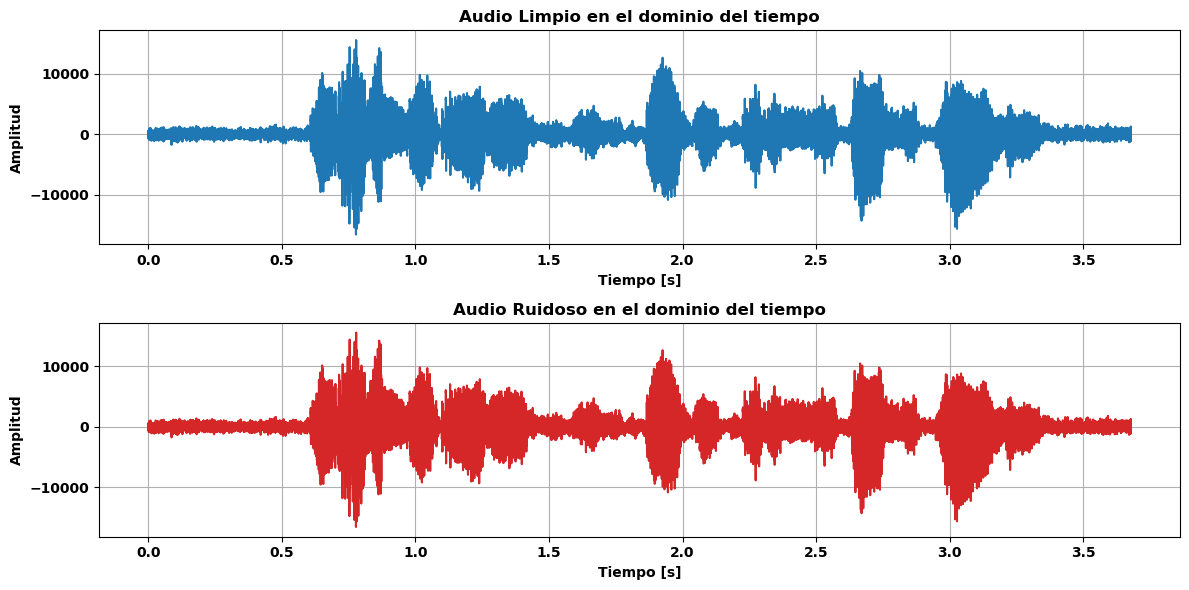

In [6]:
fig, ax = plt.subplots(2, 1, figsize=(12, 6))
fig.patch.set_facecolor('white')

ax[0].plot(t, audioClean)
ax[0].set_title('Audio Limpio en el dominio del tiempo')
ax[0].set_xlabel('Tiempo [s]')
ax[0].set_ylabel('Amplitud')
ax[0].grid(True)

ax[1].plot(t, audioNoise, c='tab:red')
ax[1].set_title('Audio Ruidoso en el dominio del tiempo')
ax[1].set_xlabel('Tiempo [s]')
ax[1].set_ylabel('Amplitud')
ax[1].grid(True)

plt.tight_layout()
plt.show();

## Espectograma con Matplotlib

- NFFT: Tamaño de la ventana.
- noverlap: muestras comunes que se sobrelapan entre ventanas vecinas

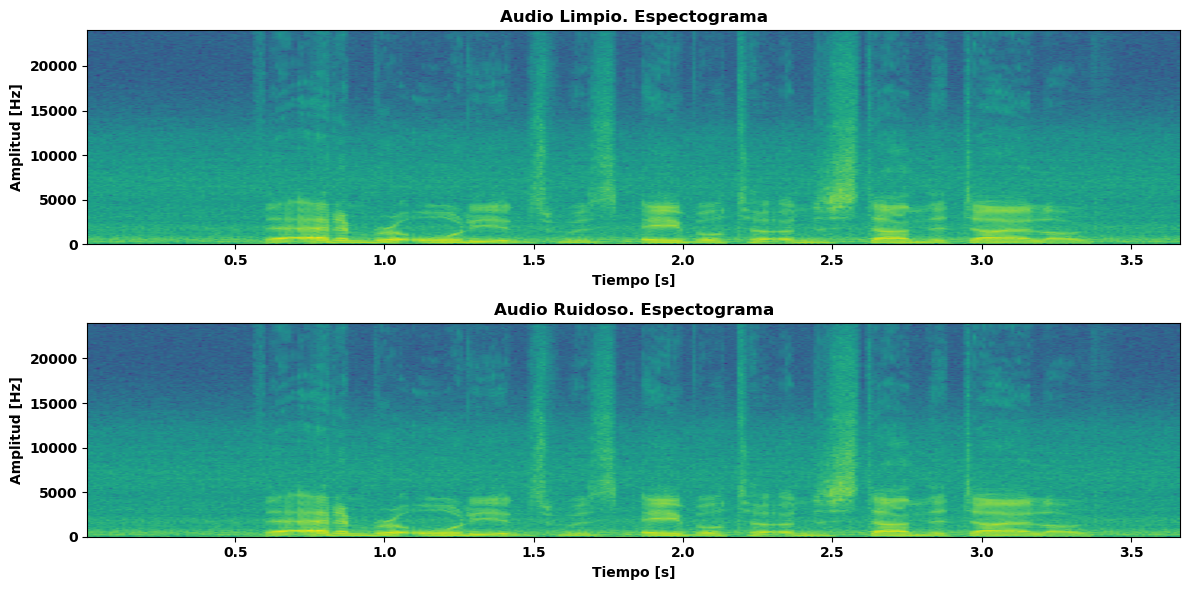

In [7]:
fig, ax = plt.subplots(2, 1, figsize=(12, 6))
fig.patch.set_facecolor('white')

Pxx, freqs, bins, im = ax[0].specgram(audioClean, NFFT=1024, Fs=fs, noverlap=512)
ax[0].set_title('Audio Limpio. Espectograma')
ax[0].set_xlabel('Tiempo [s]')
ax[0].set_ylabel('Amplitud [Hz]')
ax[0].grid(False)

Pxx, freqs, bins, im = ax[1].specgram(audioNoise, NFFT=1024, Fs=fs, noverlap=512)
ax[1].set_title('Audio Ruidoso. Espectograma')
ax[1].set_xlabel('Tiempo [s]')
ax[1].set_ylabel('Amplitud [Hz]')
ax[1].grid(False)

plt.tight_layout()
plt.show();

# Librosa

## Grafica en el dominio del tiempo

Internamente la biblioteca realiza el calculo de los tiempos.

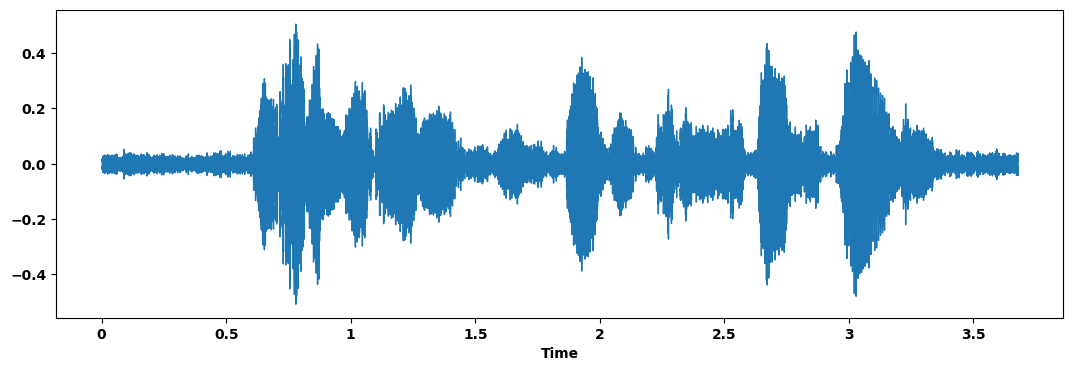

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(13, 4))
fig.patch.set_facecolor('white')
file = 'p286_460.wav'
# señal (vector de numpy con las amplitudes de la forma de onda) = sampling rate * duración del audio
senal, sr = librosa.load(file, sr=None) # sr = None para que se conserve la fs del audio. (Si no, por defecto se re-muestrea a 22050 Hz.)
librosa.display.waveshow(senal, sr=sr);

## Espectograma con LIBROSA

En el espectograma se puede graficar hasta la mitad de la frecuencia de la señal

### STFT
Se calcula la STFT de la señal de audio

In [9]:
n_fft = 2**11 # Nro. de muestras para cada ventana donde se va a realizar la stft
hop_length = int(n_fft/4) # Cuantas muestras se va a mover la ventana en cada desplazamiento (hop: salto)
stft = librosa.stft(senal, n_fft=n_fft, hop_length=hop_length, win_length=None, window='hann')
spectogram_magnitude = np.abs(stft)
spectogram_phase = np.angle(stft)

print(f'Nro. de muestras dentro de cada ventana: {n_fft}')
print(f'Duración de cada ventana: {(n_fft/sr) * 1000:.3f} ms')
print(f'Dimensiones de la Mátriz STFT resultante: {stft.shape}')
print(f'Resolución en frecuencia del espectograma: {stft.shape[0]} divisiones.')
print(f'Resolución en tiempo / Número de ventanas a lo largo de la serie de tiempo: {stft.shape[1]} ventanas.')

Nro. de muestras dentro de cada ventana: 2048
Duración de cada ventana: 42.667 ms
Dimensiones de la Mátriz STFT resultante: (1025, 345)
Resolución en frecuencia del espectograma: 1025 divisiones.
Resolución en tiempo / Número de ventanas a lo largo de la serie de tiempo: 345 ventanas.


## Espectograma: Frecuencia en escala lineal. Amplitud Lineal.

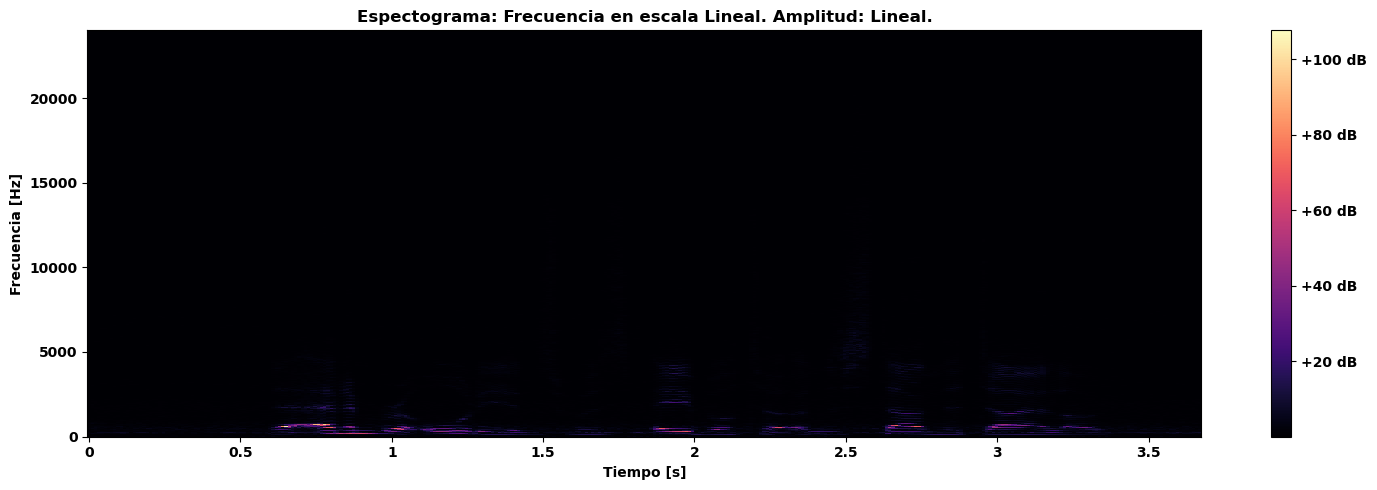

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
fig.patch.set_facecolor('white')

librosa.display.specshow(spectogram_magnitude, y_axis='linear', x_axis='time', sr=sr, hop_length=hop_length)

ax.set_title('Espectograma: Frecuencia en escala Lineal. Amplitud: Lineal.')
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Frecuencia [Hz]')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

## Espectograma: Frecuencia en escala logaritmica. Amplitud lineal.

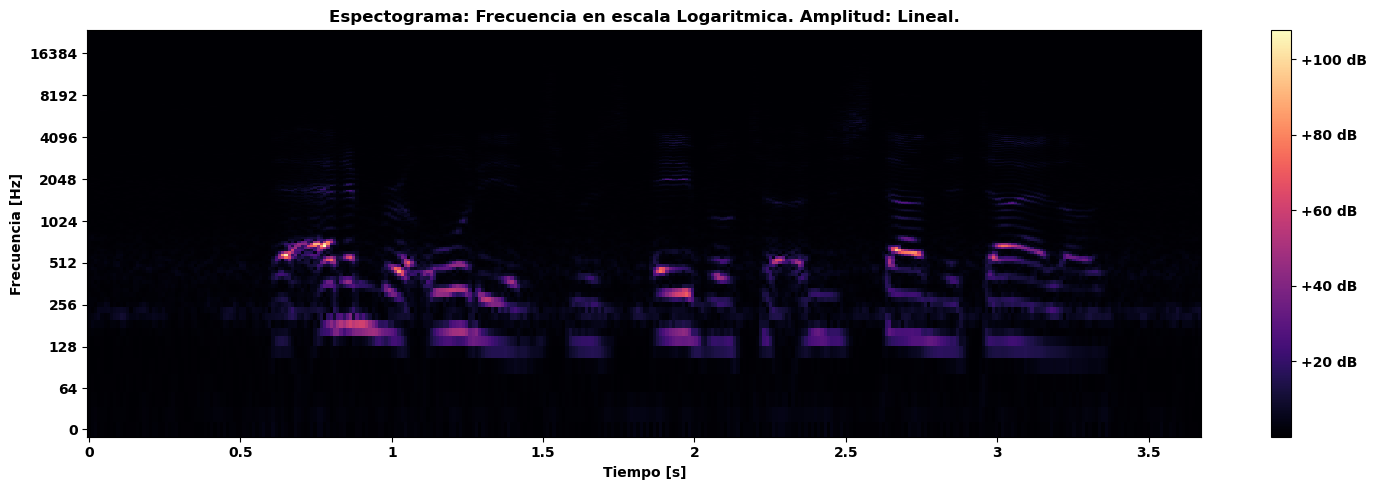

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
fig.patch.set_facecolor('white')

librosa.display.specshow(spectogram_magnitude, y_axis='log', x_axis='time', sr=sr, hop_length=hop_length)

ax.set_title('Espectograma: Frecuencia en escala Logaritmica. Amplitud: Lineal.')
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Frecuencia [Hz]')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

## Espectograma: Frecuencia en escala logaritmica. Amplitud en decibeles.

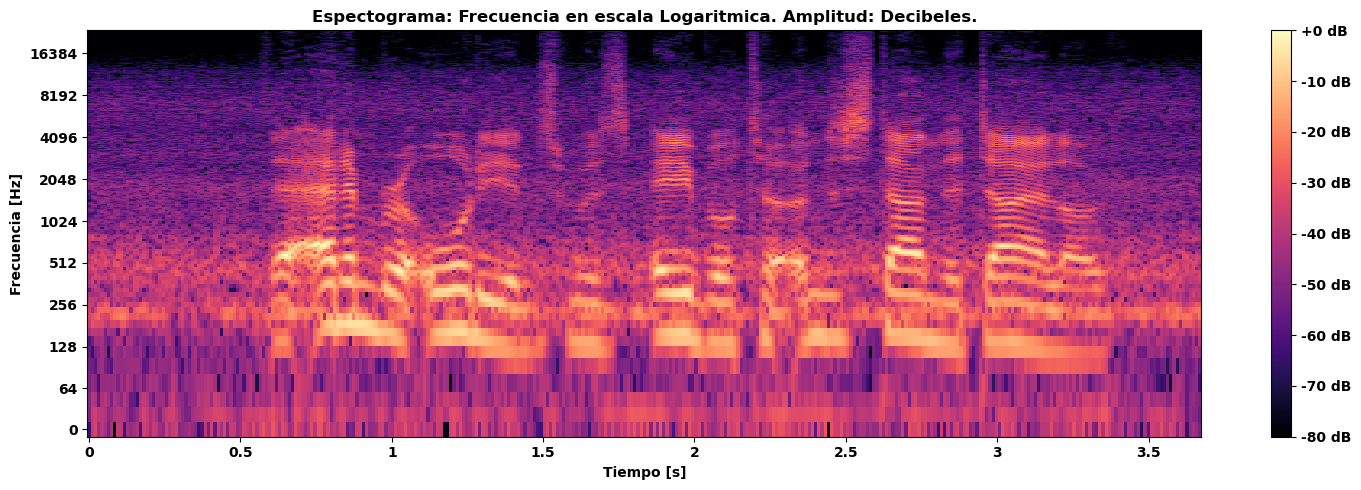

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
fig.patch.set_facecolor('white')

spectogram_dB = librosa.amplitude_to_db(spectogram_magnitude, ref=np.max)
librosa.display.specshow(spectogram_dB, y_axis='log', x_axis='time', sr=sr, hop_length=hop_length)

# log_spectogram = librosa.amplitude_to_db(spectogram)
# librosa.display.specshow(log_spectogram_magnitude, sr=sr, hop_length=hop_length)

ax.set_title('Espectograma: Frecuencia en escala Logaritmica. Amplitud: Decibeles.')
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Frecuencia [Hz]')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

## Espectograma: Escala de Frecuencias Mel. Amplitud en dB.

Escala MEL: Genera una escala de frecuencias donde el oido humano si sea capaz de discriminar las diferencias de frecuencias.

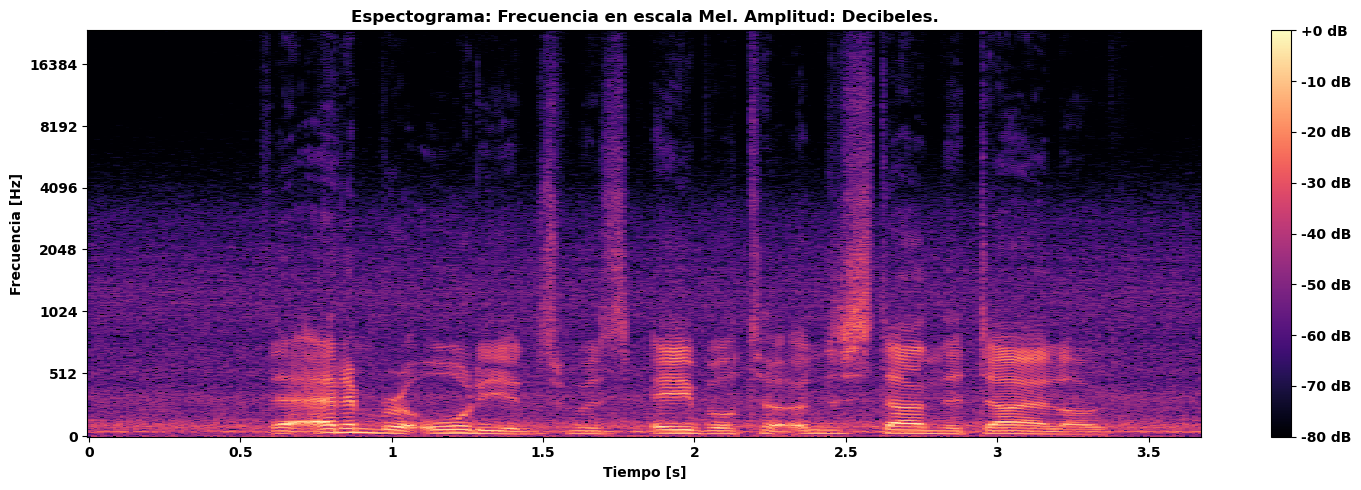

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
fig.patch.set_facecolor('white')

spectogram_dB = librosa.amplitude_to_db(spectogram_magnitude, ref=np.max)
librosa.display.specshow(spectogram_dB, y_axis='mel', fmin=0, fmax=fs/2, x_axis='time', sr=sr, hop_length=hop_length)

# MFFCs = librosa.feature.mfcc(signal, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)
# librosa.display.specshow(MFFCs, sr=sr, hop_length=hop_length)

ax.set_title('Espectograma: Frecuencia en escala Mel. Amplitud: Decibeles.')
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Frecuencia [Hz]')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()